In [ ]:
# 📊 Section 4: Ransomware Detection & Prevention
#**Dataset:** Windows API Call Sequence Dataset
#**Goal:** Train classic ML (SVM) and deep learning (LSTM) models to distinguish ransomware from benign software based on API-call features.


In [5]:
from google.colab import drive
# Force remount in case it was already mounted
drive.mount('/content/drive', force_remount=True)
import pandas as pd

# Replace <YOUR_FILENAME.csv> with the name you saw above
data_path = "/content/drive/My Drive/Windows API Call Sequence Dataset/dynamic_api_call_sequence_per_malware_100_0_306.csv"

df = pd.read_csv(data_path, header=0, sep=',', engine='python')
print("✅ Columns loaded:\n", df.columns.tolist())
df.head()



Mounted at /content/drive
✅ Columns loaded:
 ['hash', 't_0', 't_1', 't_2', 't_3', 't_4', 't_5', 't_6', 't_7', 't_8', 't_9', 't_10', 't_11', 't_12', 't_13', 't_14', 't_15', 't_16', 't_17', 't_18', 't_19', 't_20', 't_21', 't_22', 't_23', 't_24', 't_25', 't_26', 't_27', 't_28', 't_29', 't_30', 't_31', 't_32', 't_33', 't_34', 't_35', 't_36', 't_37', 't_38', 't_39', 't_40', 't_41', 't_42', 't_43', 't_44', 't_45', 't_46', 't_47', 't_48', 't_49', 't_50', 't_51', 't_52', 't_53', 't_54', 't_55', 't_56', 't_57', 't_58', 't_59', 't_60', 't_61', 't_62', 't_63', 't_64', 't_65', 't_66', 't_67', 't_68', 't_69', 't_70', 't_71', 't_72', 't_73', 't_74', 't_75', 't_76', 't_77', 't_78', 't_79', 't_80', 't_81', 't_82', 't_83', 't_84', 't_85', 't_86', 't_87', 't_88', 't_89', 't_90', 't_91', 't_92', 't_93', 't_94', 't_95', 't_96', 't_97', 't_98', 't_99', 'malware']


,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


In [4]:
# 🔸 Cell 3: Load & Preprocess Ransomware API Data 🔸

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1) Load the dataset (update path if needed)
data_path = "/content/drive/My Drive/Windows API Call Sequence Dataset/dynamic_api_call_sequence_per_malware_100_0_306.csv"
df = pd.read_csv(data_path, header=0, sep=',', engine='python')

# 2) Drop duplicates & missing
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# 3) Normalize column names
df.columns = df.columns.str.strip().str.lower()

# 4) Identify the binary label column (exactly 2 unique values)
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
print("Binary columns candidates:", binary_cols)
if not binary_cols:
    raise KeyError("No binary‐valued column found for label!")
label_col = 'label' if 'label' in binary_cols else binary_cols[0]
print("Using label column:", label_col)

# 5) Extract y and drop it from features
y = df[label_col].astype(int).values
X_df = df.drop(columns=[label_col])

# 6) Encode any categorical feature columns
cat_cols = X_df.select_dtypes(include=['object']).columns.tolist()
print("Categorical feature columns:", cat_cols)
for col in cat_cols:
    X_df[col] = LabelEncoder().fit_transform(X_df[col])

# 7) Convert to NumPy arrays
X = X_df.values.astype(float)
print(f"Feature matrix shape: {X.shape}, Label vector shape: {y.shape}")

# 8) Train/Test split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 9) Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("✅ Preprocessing complete.")
print("→ X_train_scaled:", X_train_scaled.shape, "y_train distribution:", np.bincount(y_train))
print("→ X_test_scaled :", X_test_scaled.shape,  "y_test distribution: ", np.bincount(y_test))





Mounted at /content/drive
Binary columns candidates: ['malware']
Using label column: malware
Categorical feature columns: ['hash']
Feature matrix shape: (43872, 101), Label vector shape: (43872,)
✅ Preprocessing complete.
→ X_train_scaled: (35097, 101) y_train distribution: [  860 34237]
→ X_test_scaled : (8775, 101) y_test distribution:  [ 215 8560]


=== SVM Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.43      0.60       215
           1       0.99      1.00      0.99      8560

    accuracy                           0.99      8775
   macro avg       0.99      0.71      0.80      8775
weighted avg       0.99      0.99      0.98      8775



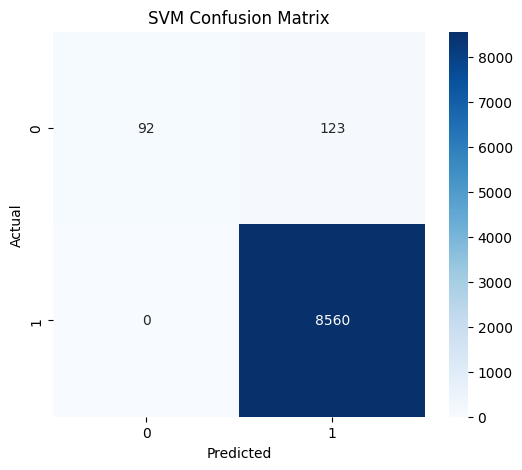

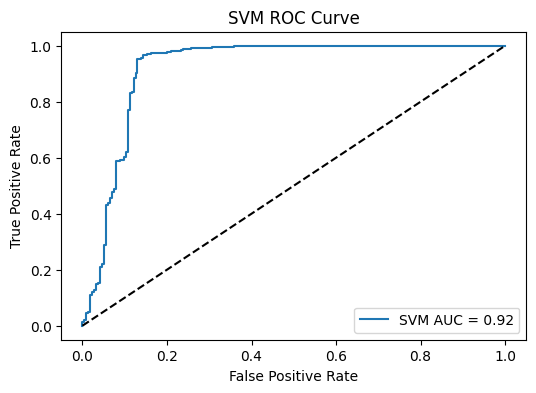

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Train SVM with probability estimates
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# 2) Predictions & report
y_pred_svm = svm.predict(X_test_scaled)
print("=== SVM Classification Report ===")
print(classification_report(y_test, y_pred_svm))

# 3) Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 4) ROC Curve
probs = svm.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"SVM AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend()
plt.show()


Epoch 1/20
1097/1097 - 7s - 6ms/step - accuracy: 0.9772 - loss: 0.1014 - val_accuracy: 0.9834 - val_loss: 0.0579
Epoch 2/20
1097/1097 - 4s - 4ms/step - accuracy: 0.9863 - loss: 0.0487 - val_accuracy: 0.9858 - val_loss: 0.0502
Epoch 3/20
1097/1097 - 6s - 5ms/step - accuracy: 0.9888 - loss: 0.0387 - val_accuracy: 0.9851 - val_loss: 0.0477
Epoch 4/20
1097/1097 - 4s - 4ms/step - accuracy: 0.9900 - loss: 0.0313 - val_accuracy: 0.9858 - val_loss: 0.0455
Epoch 5/20
1097/1097 - 4s - 4ms/step - accuracy: 0.9914 - loss: 0.0263 - val_accuracy: 0.9868 - val_loss: 0.0454
Epoch 6/20
1097/1097 - 5s - 4ms/step - accuracy: 0.9933 - loss: 0.0219 - val_accuracy: 0.9871 - val_loss: 0.0458
Epoch 7/20
1097/1097 - 4s - 4ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9874 - val_loss: 0.0487
Epoch 8/20
1097/1097 - 6s - 6ms/step - accuracy: 0.9952 - loss: 0.0156 - val_accuracy: 0.9870 - val_loss: 0.0503
Epoch 9/20
1097/1097 - 9s - 8ms/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 0.9883 - 

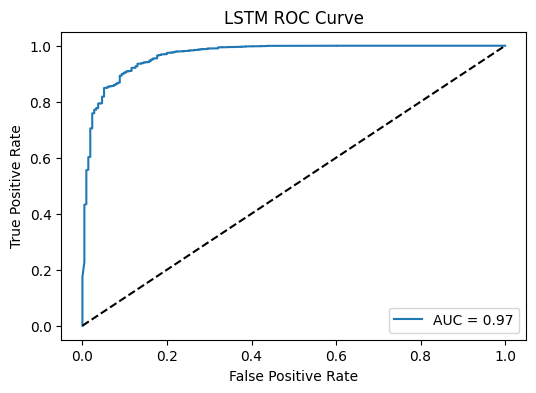

In [6]:
# 🔸 Cell: LSTM Training & Full Evaluation 🔸

# Make sure preprocessing has been done and these exist:
# X_train_scaled, X_test_scaled, y_train, y_test

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    classification_report
)
import matplotlib.pyplot as plt

# Reshape for LSTM
X_train_lstm = X_train_scaled.reshape((-1, 1, X_train_scaled.shape[1]))
X_test_lstm  = X_test_scaled.reshape((-1, 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential([
    Input(shape=(1, X_train_scaled.shape[1])),
    LSTM(64, activation='tanh'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    X_train_lstm, y_train,
    epochs=20, batch_size=32,
    validation_data=(X_test_lstm, y_test),
    verbose=2
)

# Predict probabilities and classes
y_probs = model.predict(X_test_lstm).flatten()
y_pred  = (y_probs > 0.5).astype(int)

# Compute metrics
acc    = accuracy_score(y_test, y_pred)
prec   = precision_score(y_test, y_pred)
rec    = recall_score(y_test, y_pred)
f1     = f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Print results
print("=== LSTM Performance ===")
print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1-Score : {f1:.2f}")
print(f"ROC AUC  : {roc_auc:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LSTM ROC Curve")
plt.legend()
plt.show()



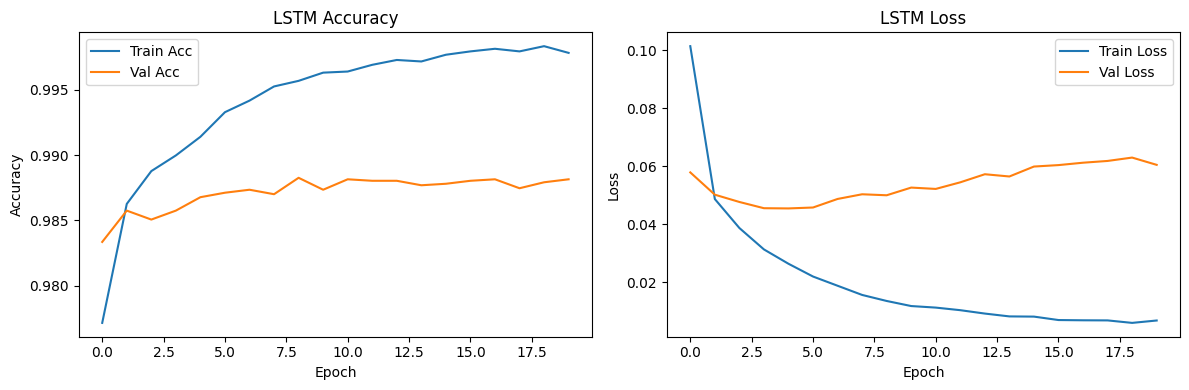

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("LSTM Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("LSTM Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
